In [2]:
!pip install seaborn

[*********************100%***********************]  1 of 1 completed


<ipython-input-25-d33314246383>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Cluster'] = kmeans.labels_
<ipython-input-25-d33314246383>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Cluster'] = kmeans.predict(X_test)


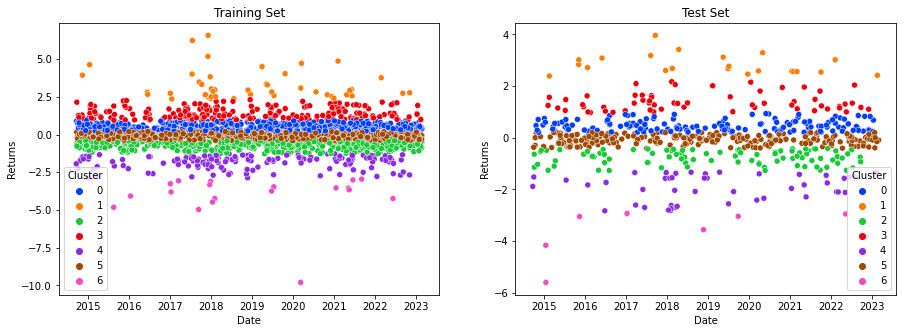

In [25]:
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#Define the stock specifications
stock_symbol="BTC-USD"
start_date="2014-01-11"
end_date="2023-03-01"

#Download the stock data from yahoo
df=yf.download(stock_symbol,start=start_date,end=end_date)

#Return_daily=V-(today-V_yesterday)/V_yesterday*100

#calculate the daily returns
df['Returns']=df['Close'].pct_change()

#Drop the first row (which has a NAN Value)
df=df.dropna()

#preprocess the data
X=df[['Returns']]
X=(X-X.mean()) / X.std()#standardise the data

#split the data into training and test sets
X_train,X_test=train_test_split(X,test_size=0.2,random_state=0)

#perform kmeans clustering on the training set
kmeans=KMeans(n_clusters=7,random_state=0).fit(X_train)

X_train['Cluster'] = kmeans.labels_


#Apply the clustring to the test set
X_test['Cluster'] = kmeans.predict(X_test)

# Plot the clusters on the training and test sets
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.scatterplot(data=X_train, x=X_train.index, y='Returns', hue='Cluster', palette='bright', ax=axs[0])
sns.scatterplot(data=X_test, x=X_test.index, y='Returns', hue='Cluster', palette='bright', ax=axs[1])
axs[0].set(title='Training Set')
axs[1].set(title='Test Set')
plt.show()


[1 4 0 1 1 0 4 1 0 4 4 0 0 0 6 1 0 3 0 0 3 0 0 1 0 2 4 0 0 3 3 6 0 0 0 1 0
 2 0 0 0 3 3 0 0 0 6 4 1 0 0 3 4 1 0 1 1 0 2 0 0 6 2 3 0 1 0 4 1 0 3 3 1 0
 5 4 0 0 1 3 3 3 1 1 3 0 0 2 2 3 4 3 0 0 2 0 0 0 0 0 1 2 3 0 1 0 0 3 3 1 0
 1 3 1 0 0 0 0 2 1 5 5 0 1 0 3 1 0 0 0 2 5 1 2 4 0 0 0 1 1 3 1 3 0 0 3 0 2
 0 2 1 2 0 0 6 1 0 5 1 3 1 5 0 0 0 3 4 0 0 0 1 6 0 2 0 3 0 1 3 0 2 1 1 0 3
 1 0 2 4 0 4 1 1 3 0 0 3 0 2 0 5 0 1 1 3 3 4 0 4 3 3 3 4 1 0 1 1 1 0 5 1 0
 0 1 1 0 3 0 1 0 0 5 0 0 0 1 0 0 0 3 0 0 3 0 0 1 2 0 0 3 1 1 0 1 0 0 0 1 0
 0 4 4 2 0 0 1 3 0 5 0 3 1 2 1 4 0 0 0 0 0 1 4 1 3 0 5 3 2 3 0 0 1 3 3 1 1
 3 1 0 0 1 1 2 0 1 1 5 0 3 0 3 4 4 0 1 4 0 2 6 0 2 1 2 0 0 1 3 0 0 1 2 1 3
 2 0 3 0 1 0 3 0 3 4 1 0 0 0 5 0 1 3 2 3 2 1 1 0 3 5 0 1 2 4 1 1 1 3 0 3 0
 1 0 0 2 0 4 1 0 0 2 5 2 1 0 0 4 0 0 4 3 3 0 2 0 2 1 0 1 0 2 0 0 3 3 0 0 4
 1 0 3 1 3 0 0 2 1 0 3 2 0 1 4 0 1 1 2 1 0 0 3 4 2 0 4 0 0 1 1 2 1 1 1 1 3
 0 0 0 1 0 1 2 0 0 1 1 0 0 0 2 0 1 0 1 1 2 3 3 3 0 2 1 0 0 0 2 3 0 3 1 4 5
 1 0 1 0 3 1 0 1 0 0 3 1 

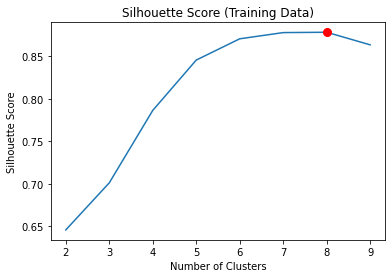

In [26]:

# Evaluate the performance of KMeans on the training set using Silhouette

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def find_best_n_clusters(X):
    silhouette_scores = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return best_n_clusters

# Find the best number of clusters for training data
best_n_clusters_train = find_best_n_clusters(X_train)

# Fit KMeans with the best number of clusters for training data
kmeans_train = KMeans(n_clusters=best_n_clusters_train)
kmeans_train.fit(X_train)

# Find the best number of clusters for test data
best_n_clusters_test = find_best_n_clusters(X_test)

# Fit KMeans with the best number of clusters for test data
kmeans_test = KMeans(n_clusters=best_n_clusters_test)
kmeans_test.fit(X_test)

# Get the labels for test data
test_cluster_labels = kmeans_test.labels_
test_label=print(test_cluster_labels)

# Plot the evaluation metrics for training data
silhouette_scores_train = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    silhouette_scores_train.append(silhouette_score(X_train, kmeans.labels_))


scores=print(silhouette_scores_train)

sns.lineplot(x=range(2, 10), y=silhouette_scores_train)
plt.plot(best_n_clusters_train, silhouette_scores_train[best_n_clusters_train-2], 'ro', markersize=8)
plt.title('Silhouette Score (Training Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


